# Wine Classification with KNN

In [1]:
from sklearn import datasets

In [2]:
wine = datasets.load_wine()

In [3]:
# 탐색
x = wine.data
y = wine.target
columns = wine.feature_names

print("x:", x.shape)
print("y:", y.shape)

x: (178, 13)
y: (178,)


In [4]:
print(columns)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [6]:
import pandas as pd
x_df = pd.DataFrame(x, columns=columns)
x_df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


In [8]:
x_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
set(y)

{0, 1, 2}

### split

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
k_=range(1,11)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k_[0])

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score

print("acc : {:.4f}".format(accuracy_score(y_test, y_pred)))

acc : 0.6389


In [39]:
pred = []
for k in k_:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print("k : {}, acc : {:.4f}".format(k, accuracy_score(y_test, y_pred)))
    pred.append(accuracy_score(y_test, y_pred))
    
print(pred)

k : 1, acc : 0.6389
k : 2, acc : 0.6944
k : 3, acc : 0.7500
k : 4, acc : 0.6944
k : 5, acc : 0.7500
k : 6, acc : 0.7778
k : 7, acc : 0.6667
k : 8, acc : 0.6667
k : 9, acc : 0.6944
k : 10, acc : 0.6667
[0.6388888888888888, 0.6944444444444444, 0.75, 0.6944444444444444, 0.75, 0.7777777777777778, 0.6666666666666666, 0.6666666666666666, 0.6944444444444444, 0.6666666666666666]


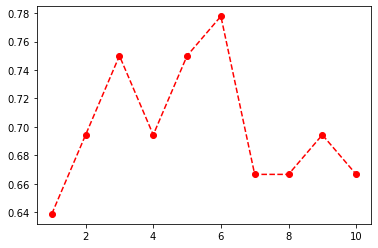

In [40]:
import matplotlib.pyplot as plt

plt.plot(k_, pred, '--ro')
plt.show()

### Breast_Cancer Classification with KNN

In [86]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()


In [87]:
columns = breast_cancer_data.feature_names
data = breast_cancer_data.data
labels = breast_cancer_data.target
df_data = pd.DataFrame(data, columns=columns)
df_labels = pd.DataFrame(labels)

In [88]:
columns

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [89]:
df_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [90]:
df_labels.head()

,0
0,0
1,0
2,0
3,0
4,0


In [91]:
df_labels.nunique()

0    2
dtype: int64

In [92]:
df_data.shape, df_labels.shape

((569, 30), (569, 1))

In [93]:
from sklearn.preprocessing import normalize

In [94]:
norm_data = normalize(data)

In [95]:
# for x in range(len(df_data.columns)):
#     normalized_df_data = normalize(df_data[x])

norm_df_data = pd.DataFrame(norm_data, columns=columns)
norm_df_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.014843,0.022010,0.096006,0.605084,0.000113,0.000110,0.000079,0.000042,0.000212,0.000076,...,0.016745,0.029162,0.109652,0.777287,0.000155,0.000262,0.000261,0.000108,0.000335,0.000099
std,0.004011,0.011077,0.024912,0.047241,0.000059,0.000065,0.000073,0.000023,0.000111,0.000043,...,0.004009,0.014452,0.025127,0.037726,0.000083,0.000175,0.000236,0.000053,0.000170,0.000056
min,0.005512,0.004568,0.036396,0.376233,0.000022,0.000024,0.000000,0.000000,0.000041,0.000011,...,0.007245,0.005154,0.050496,0.696047,0.000027,0.000042,0.000000,0.000000,0.000046,0.000015
25%,0.011690,0.014104,0.076533,0.582554,0.000072,0.000068,0.000039,0.000027,0.000137,0.000045,...,0.013843,0.018349,0.092567,0.749906,0.000099,0.000148,0.000139,0.000077,0.000223,0.000061
50%,0.015061,0.020352,0.097151,0.615219,0.000104,0.000094,0.000064,0.000038,0.000194,0.000069,...,0.016722,0.027027,0.109760,0.768914,0.000142,0.000222,0.000213,0.000102,0.000308,0.000089
75%,0.017354,0.026888,0.111015,0.639475,0.000141,0.000133,0.000103,0.000054,0.000264,0.000094,...,0.019225,0.036616,0.125560,0.799809,0.000190,0.000322,0.000320,0.000133,0.000422,0.000120
max,0.028470,0.086609,0.178585,0.697401,0.000477,0.000557,0.000826,0.000161,0.000787,0.000319,...,0.032340,0.108567,0.205583,0.921243,0.000646,0.001474,0.002974,0.000416,0.001196,0.000445


In [96]:
x_train, x_test, y_train, y_test = train_test_split(norm_data, labels, test_size=0.2)

In [97]:
k_=range(1, 101)

knn = KNeighborsClassifier(n_neighbors=k_[0])

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

In [98]:
pred = []
for k in k_:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
#     print("k : {}, acc : {:.4f}".format(k, accuracy_score(y_test, y_pred)))
    pred.append(accuracy_score(y_test, y_pred))
    
# print(pred)

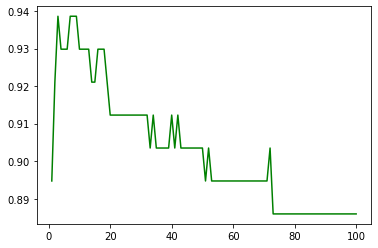

In [99]:
import matplotlib.pyplot as plt

plt.plot(k_, pred, '-g')
plt.show()